In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

from sklearn.ensemble import RandomForestClassifier

In [3]:
def class_balance(values):
    unique, counts = np.unique(values, return_counts=True)

    for cls, cnt in zip(unique, counts):
        print("Class [%d] Count [%d]" % (cls, cnt))

In [4]:
def read_df(filename):
    df = pd.read_csv(filename)
    print(df.shape)

    # Filter list of columns which will be used for training
    bin_cols = [col for col in df.columns if 'bin_' in col]

    # remove first and last values as those are over/under flows
    bin_cols = bin_cols[1:-1]

    # Drop empty rows
    df.drop(df[df.entries == 0].index, inplace=True)
    print(df.shape)

    # Normalization, divide every bin value by total entries
    X = df.filter(bin_cols, axis=1).copy().div(df.entries, axis=0)

    y = df["good_pixel"]
    
    return df, X, y

In [5]:
df_train, X_train, y_train = read_df("/home/mantydze/data/ZeroBias2017B/massaged/chargeInner_PXLayer_1.csv")
class_balance(y_train)
df_test, X_test, y_test = read_df("/home/mantydze/data/ZeroBias2017D/massaged/chargeInner_PXLayer_1.csv")
class_balance(y_test)

(28335, 120)
(27208, 120)
Class [0] Count [1288]
Class [1] Count [25920]
(28747, 115)
(27641, 115)
Class [1] Count [27641]


In [17]:
# Train on EraB
model = RandomForestClassifier(n_jobs=6).fit(X_train, y_train)

# Predict on EraD
y_pred = model.predict(X_test)
class_balance(y_pred)

Class [0] Count [1267]
Class [1] Count [26374]


In [ ]:
print("ACC", round(accuracy_score(y_test, y_pred), 3))

In [21]:
misclass = y_test.index[y_test != y_pred].tolist()

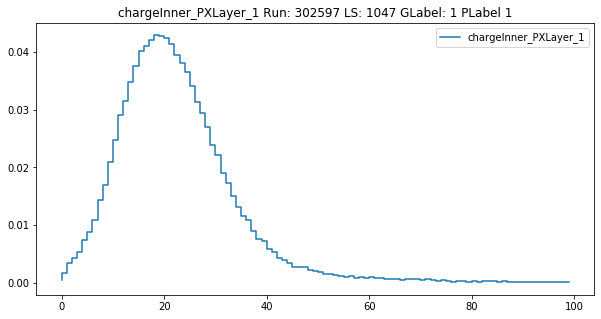

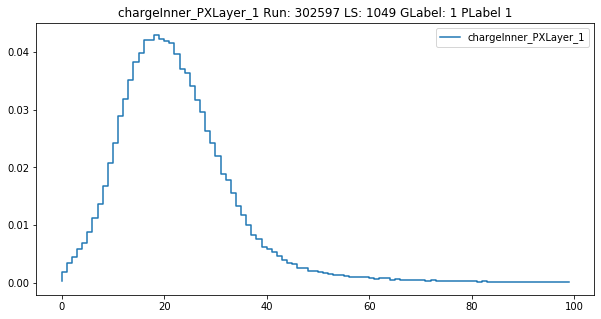

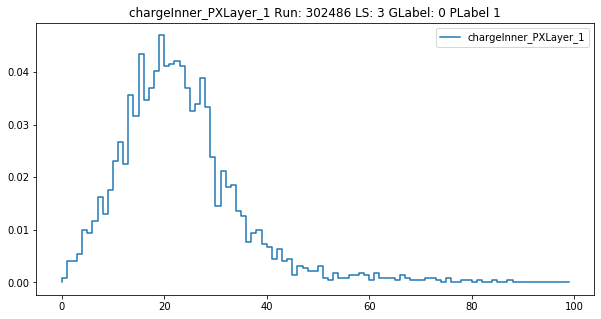

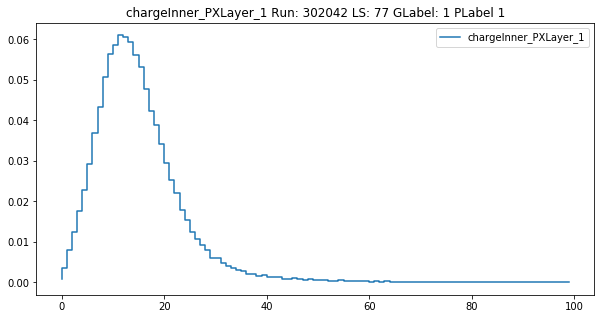

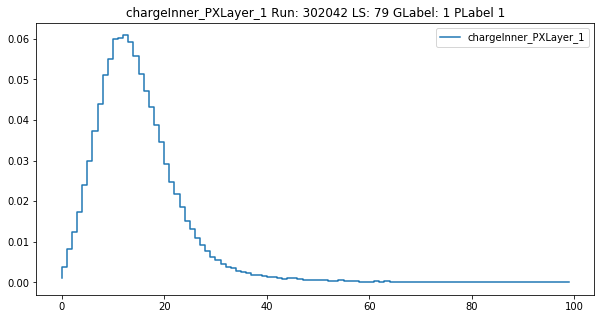

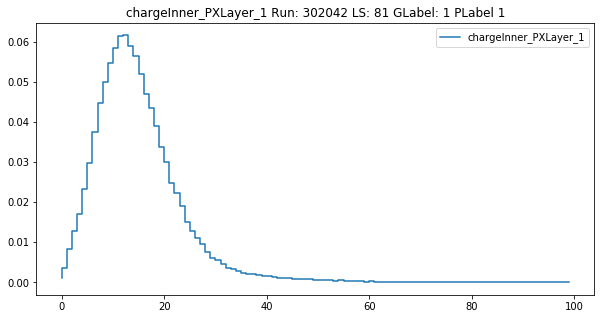

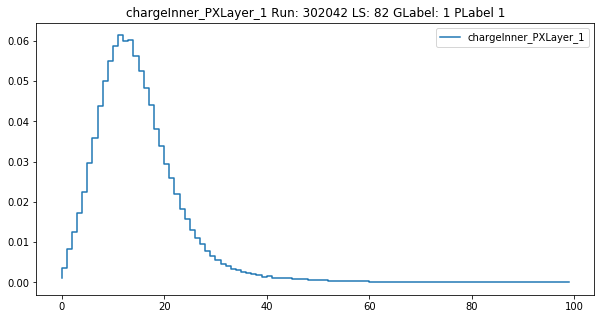

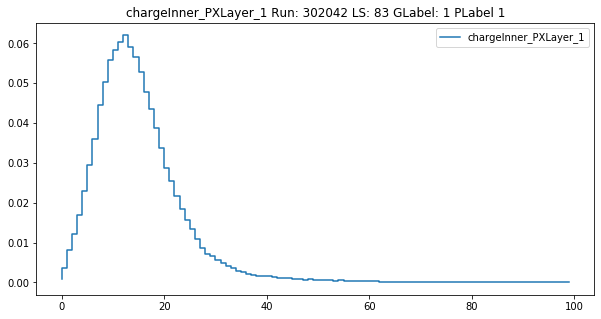

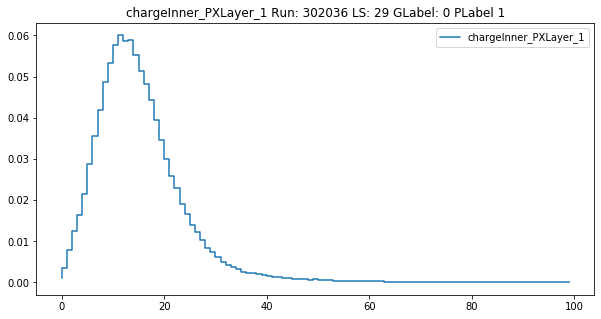

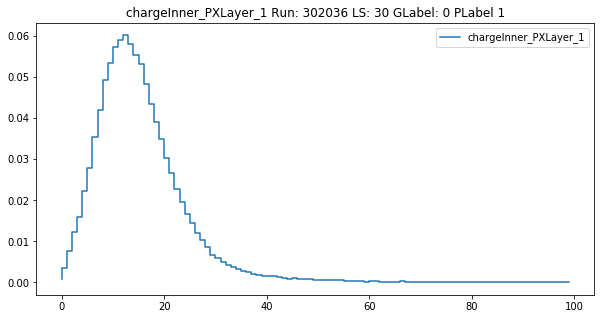

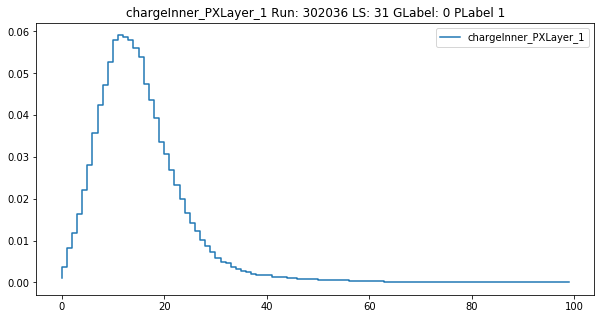

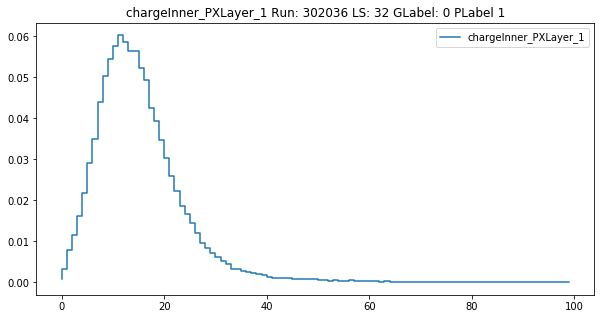

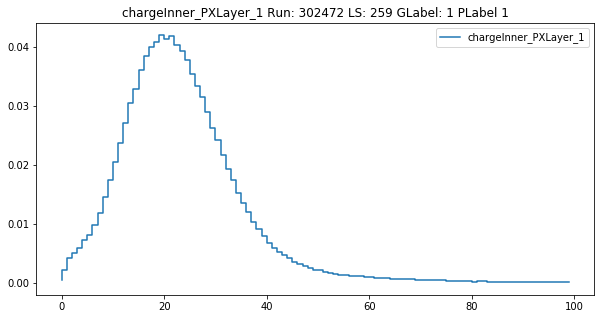

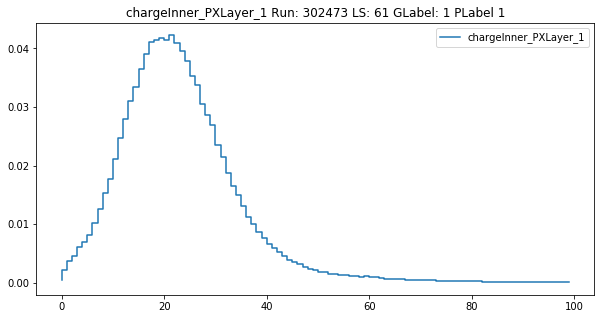

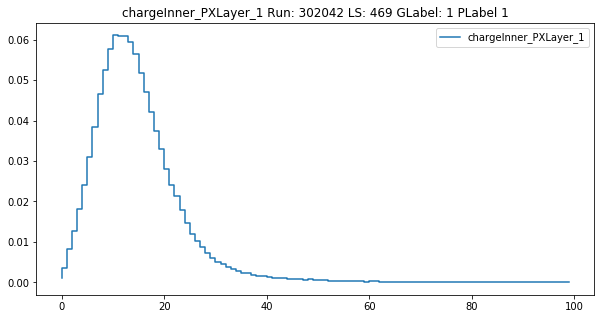

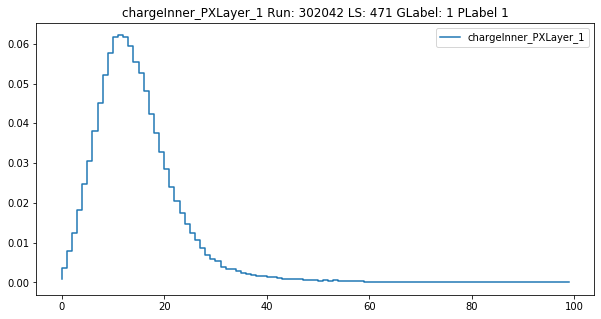

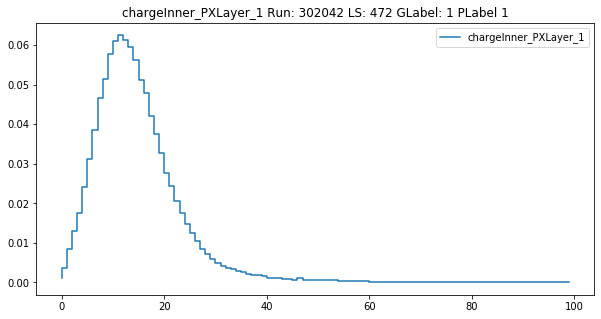

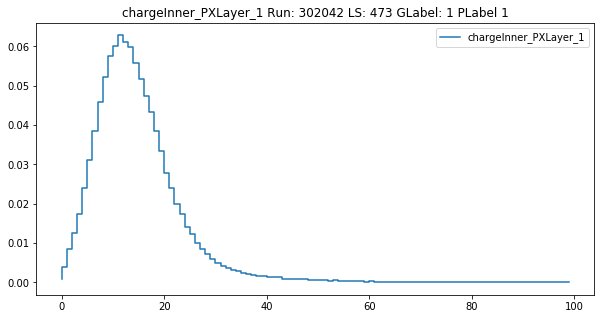

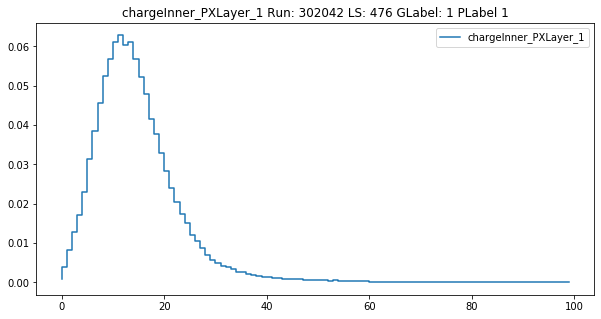

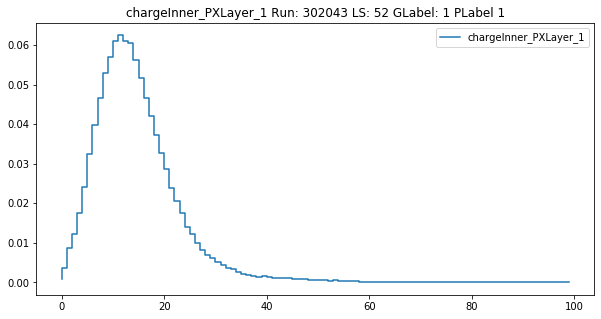

In [33]:
import matplotlib.pyplot as plt

def view_histo(row, data):
    
#     print(row)
#     return
    hname = row["hname"]
    ls_number = row["lumi"]
    run_number = row["run"]
    is_good = row["good"]
    is_good_pixel = row["good_pixel"]
    
    plt.figure(figsize=(10, 5))
    plt.title("%s Run: %s LS: %s GLabel: %d PLabel %d" % (hname, run_number, ls_number, is_good, is_good_pixel))

    plt.plot(range(len(data)), data, drawstyle='steps-pre', label=hname)
    plt.legend()

i = 2

for i in range(0, 20):
    view_histo(df_test.iloc[misclass[i]], X_test.iloc[misclass[i]])

# view_histo(df_test.iloc[0], X_test.iloc[misclass[0]])

In [19]:
print("ACC", round(accuracy_score(y_test, y_pred), 3))

ACC 0.954


In [ ]:
y_probas = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probas)
auc_score = auc(fpr, tpr)

print("AUC", round(auc_score, 3))

In [ ]:
class RandomForestTrain:
    
    def __init__(self):
        self.accs = []
        self.aucs = []
        
    def load_data(self, filename):
        self.df = pd.read_csv(filename)
        print(self.df.shape)
        
        # Filter list of columns which will be used for training
        bin_cols = [col for col in self.df.columns if 'bin_' in col]

        # remove first and last values as those are over/under flows
        bin_cols = bin_cols[1:-1]
        
        # Drop empty rows
        self.df.drop(self.df[self.df.entries == 0].index, inplace=True)
        print(self.df.shape)
            
        # Normalization, divide every bin value by total entries
        self.X = self.df.filter(bin_cols, axis=1).copy().div(self.df.entries, axis=0)

        self.y = self.df["good_pixel"]
    
    def train_eval(self, verbose=True):
        
        skf = StratifiedKFold(n_splits=10, shuffle=True)

        for train_index, test_index in skf.split(self.X, self.y):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
        
            
            model = RandomForestClassifier(n_jobs=6).fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            if verbose:
                print(confusion_matrix(y_test, y_pred))

            acc_score = accuracy_score(y_test, y_pred)

            y_probas = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_probas)
            auc_score = auc(fpr, tpr)
            
            if verbose:
                print("ACC", round(acc_score, 3) , "AUC", round(auc_score, 3))

            self.accs.append(round(acc_score, 3))
            self.aucs.append(round(auc_score, 3))

In [ ]:
# # Class balance
def class_balance(values):
    unique, counts = np.unique(values, return_counts=True)

    for cls, cnt in zip(unique, counts):
        print("Class [%d] Count [%d]" % (cls, cnt))
        
class_balance(y)

In [ ]:
# Histogram names to be trained
cipxl = ["chargeInner_PXLayer_1", "chargeInner_PXLayer_2", "chargeInner_PXLayer_3", "chargeInner_PXLayer_4"]
copxl = ["chargeOuter_PXLayer_1", "chargeOuter_PXLayer_2", "chargeOuter_PXLayer_3", "chargeOuter_PXLayer_4"]
spxl = ["size_PXLayer_1", "size_PXLayer_2", "size_PXLayer_3", "size_PXLayer_4"]
spxd = ["size_PXDisk_-3", "size_PXDisk_-2", "size_PXDisk_-1", "size_PXDisk_+1", "size_PXDisk_+2", "size_PXDisk_+3"]
cpxd = ["charge_PXDisk_-3", "charge_PXDisk_-2", "charge_PXDisk_-1", "charge_PXDisk_+1", "charge_PXDisk_+2", "charge_PXDisk_+3"]

hnames = cipxl + copxl + spxl + spxd + cpxd

In [ ]:
results = {}

for index, hname in enumerate(hnames):
    print(index+1, "/", len(hnames), hname)
    
    filename = "/home/mantydze/data/ZeroBias2017B/massaged/{hname}.csv".format(hname=hname)
    
    rft = RandomForestTrain()
    rft.load_data(filename)
    rft.train_eval(verbose=False)
    
    results[hname] = {
        "accs": rft.accs, 
        "aucs": rft.aucs,
        "acc_mean": round(np.mean(rft.accs), 3),
        "acc_std": round(np.std(rft.accs), 3),
        "auc_mean": round(np.mean(rft.aucs), 3),
        "auc_std": round(np.std(rft.aucs), 3)
    }
    
    print("Mean ACC", results[hname]["acc_mean"], "std", results[hname]["acc_std"]) 
    print("Mean AUC", results[hname]["auc_mean"], "std", results[hname]["auc_std"]) 
    print()

In [ ]:
df = pd.DataFrame.from_dict(results, orient='index')

In [ ]:
df

In [ ]:
results